In [1]:
pip install tensorflow_datasets

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [2]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

#Read the dataset :imdb reviews

In [3]:
imdb, info = tfds.load("imdb_reviews",with_info=True,as_supervised=True)

In [4]:
imdb

{'train': <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'test': <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'unsupervised': <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [5]:
train_data,test_data=imdb['train'],imdb['test']
type(train_data)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [6]:
training_sentences=[]
training_labels=[]
testing_sentences=[]
testing_labels=[]

# iterate through the training and testing data:
# here, s=> input, l=> output

for s,l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())
for s, l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())

In [7]:
training_sentences[0]

'b"This was an absolutely terrible movie. Don\'t be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie\'s ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor\'s like Christopher Walken\'s good name. I could barely sit through it."'

In [8]:
testing_labels[0]

1

In [9]:
training_labels_final=np.array(training_labels)
testing_labels_final=np.array(testing_labels)

In [10]:
len(training_sentences),len(testing_sentences)

(25000, 25000)

In [11]:
training_labels_final.size, testing_labels_final.size

(25000, 25000)

In [12]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post' # padding  

In [13]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words= vocab_size)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
word_index;
len(word_index)

86538

In [14]:
word_index

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'with': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 "'s": 20,
 'on': 21,
 'you': 22,
 'not': 23,
 'are': 24,
 'his': 25,
 'he': 26,
 'have': 27,
 'be': 28,
 'one': 29,
 'all': 30,
 'at': 31,
 'by': 32,
 'they': 33,
 'an': 34,
 'who': 35,
 'so': 36,
 'from': 37,
 'like': 38,
 'her': 39,
 "'t": 40,
 'or': 41,
 'just': 42,
 'there': 43,
 'about': 44,
 'out': 45,
 "'": 46,
 'has': 47,
 'if': 48,
 'some': 49,
 'what': 50,
 'good': 51,
 'more': 52,
 'very': 53,
 'when': 54,
 'she': 55,
 'up': 56,
 'can': 57,
 'b': 58,
 'time': 59,
 'no': 60,
 'even': 61,
 'my': 62,
 'would': 63,
 'which': 64,
 'story': 65,
 'only': 66,
 'really': 67,
 'see': 68,
 'their': 69,
 'had': 70,
 'were': 71,
 'me': 72,
 'well': 73,
 'we': 74,
 'than': 75,
 'much': 76,
 'been': 77,
 'get': 78,
 'bad': 79,
 'will': 80,
 'people': 81,
 'do': 82,
 'also': 83,


In [15]:
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen= max_length)


In [16]:
len(sequences)

25000

In [17]:
len(sequences[0])

110

In [18]:
# after padding size:
len(padded[0])

120

In [19]:
padded.shape

(25000, 120)

In [20]:
testing_padded.shape

(25000, 120)

In [21]:
padded.dtype

dtype('int32')

# Build the simpleRNN model:

In [22]:
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN,Embedding

In [23]:
model_rnn=Sequential([
    Embedding(vocab_size,embedding_dim,input_length=max_length),
    SimpleRNN(32),
    Dense(10,activation='relu'),
    Dense(1,activation='sigmoid')])

model_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1568      
                                                                 
 dense (Dense)               (None, 10)                330       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 161909 (632.46 KB)
Trainable params: 161909 (632.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
# Compile the RNN model

In [25]:
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

In [26]:
history = model_rnn.fit(padded,training_labels_final,epochs=10,validation_data=(testing_padded,testing_labels_final))

Epoch 1/10



782/782 [==============================] - 33s 40ms/step - loss: 0.6932 - accuracy: 0.4960 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
782/782 [==============================] - 30s 39ms/step - loss: 0.6932 - accuracy: 0.5004 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
782/782 [==============================] - 29s 38ms/step - loss: 0.6938 - accuracy: 0.5051 - val_loss: 0.6939 - val_accuracy: 0.5249
Epoch 4/10
782/782 [==============================] - 31s 39ms/step - loss: 0.6712 - accuracy: 0.5904 - val_loss: 0.6460 - val_accuracy: 0.6214
Epoch 5/10
782/782 [==============================] - 30s 38ms/step - loss: 0.5842 - accuracy: 0.6940 - val_loss: 0.6250 - val_accuracy: 0.6555
Epoch 6/10
782/782 [==============================] - 30s 39ms/step - loss: 0.4603 - accuracy: 0.7891 - val_loss: 0.5367 - val_accuracy: 0.7536
Epoch 7/10
782/782 [==============================] - 31s 40ms/step - loss: 0.3863 - accuracy: 0.8316 - val_loss: 0.5600 - val_accuracy: 0.7585
Epo

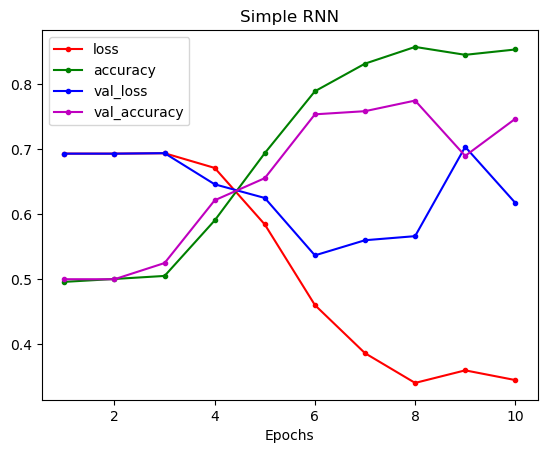

In [27]:
import matplotlib.pyplot as plt

plt.title('Simple RNN')
plt.xlabel('Epochs')
plt.plot(range(1,11), history.history['loss'], color = 'r', label = 'loss', marker = '.')
plt.plot(range(1,11), history.history['accuracy'], color = 'g', label = 'accuracy', marker = '.')
plt.plot(range(1,11), history.history['val_loss'], color = 'b', label = 'val_loss', marker = '.')
plt.plot(range(1,11), history.history['val_accuracy'], color = 'm', label = 'val_accuracy', marker = '.')
plt.legend(loc = 'upper left')


# Build model With LSTM:

In [28]:
from keras.layers import Bidirectional, GRU, LSTM

In [29]:
model_lstm=Sequential([
    Embedding(vocab_size,embedding_dim,input_length=max_length),
    Bidirectional(LSTM(32)),
    Dense(10,activation='relu'),
    Dense(1,activation='sigmoid')])

model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional (Bidirection  (None, 64)                12544     
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 173205 (676.58 KB)
Trainable params: 173205 (676.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
# Compile LSTM model:

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

In [31]:
history_lstm = model_lstm.fit(padded,training_labels_final, epochs=10, validation_data = (testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 52s 61ms/step - loss: 0.4711 - accuracy: 0.7660 - val_loss: 0.3405 - val_accuracy: 0.8553
Epoch 2/10
782/782 [==============================] - 48s 62ms/step - loss: 0.2953 - accuracy: 0.8843 - val_loss: 0.3651 - val_accuracy: 0.8450
Epoch 3/10
782/782 [==============================] - 48s 62ms/step - loss: 0.2318 - accuracy: 0.9124 - val_loss: 0.4344 - val_accuracy: 0.8403
Epoch 4/10
782/782 [==============================] - 48s 61ms/step - loss: 0.1833 - accuracy: 0.9337 - val_loss: 0.4606 - val_accuracy: 0.8374
Epoch 5/10
782/782 [==============================] - 48s 61ms/step - loss: 0.1554 - accuracy: 0.9451 - val_loss: 0.4864 - val_accuracy: 0.8306
Epoch 6/10
782/782 [==============================] - 47s 61ms/step - loss: 0.1357 - accuracy: 0.9515 - val_loss: 0.5244 - val_accuracy: 0.8300
Epoch 7/10
782/782 [==============================] - 47s 61ms/step - loss: 0.1069 - accuracy: 0.9638 - val_loss: 0.6077 - val_accuracy:

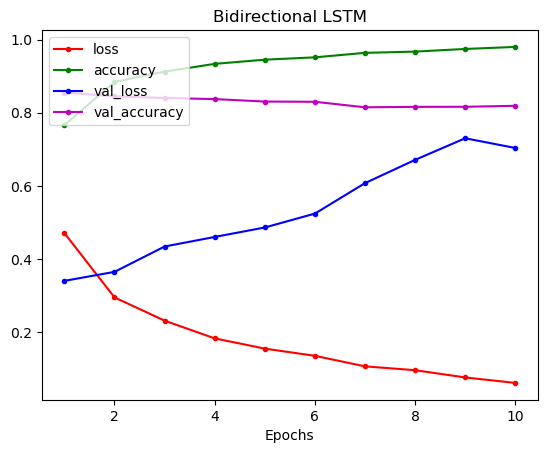

In [32]:
import matplotlib.pyplot as plt

plt.title('Bidirectional LSTM')
plt.xlabel('Epochs')
plt.plot(range(1,11), history_lstm.history['loss'], color = 'r', label = 'loss', marker = '.')
plt.plot(range(1,11), history_lstm.history['accuracy'], color = 'g', label = 'accuracy', marker = '.')
plt.plot(range(1,11), history_lstm.history['val_loss'], color = 'b', label = 'val_loss', marker = '.')
plt.plot(range(1,11), history_lstm.history['val_accuracy'], color = 'm', label = 'val_accuracy', marker = '.')
plt.legend(loc = 'upper left')

# Build model with GRU:

In [34]:
model_gru = Sequential([
    Embedding(vocab_size,embedding_dim,input_length=max_length),
    Bidirectional(GRU(32)),
    Dense(10,activation='relu'),
    Dense(1,activation='sigmoid')])

model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                9600      
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 170261 (665.08 KB)
Trainable params: 170261 (665.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
# Compile GRU model:

model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

In [36]:
history_gru = model_gru.fit(padded,training_labels_final, epochs=10, validation_data = (testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 56s 66ms/step - loss: 0.5338 - accuracy: 0.7068 - val_loss: 0.4002 - val_accuracy: 0.8221
Epoch 2/10
782/782 [==============================] - 51s 65ms/step - loss: 0.3087 - accuracy: 0.8765 - val_loss: 0.3442 - val_accuracy: 0.8504
Epoch 3/10
782/782 [==============================] - 52s 66ms/step - loss: 0.2381 - accuracy: 0.9108 - val_loss: 0.3706 - val_accuracy: 0.8437
Epoch 4/10
782/782 [==============================] - 50s 64ms/step - loss: 0.1845 - accuracy: 0.9330 - val_loss: 0.3859 - val_accuracy: 0.8407
Epoch 5/10
782/782 [==============================] - 50s 64ms/step - loss: 0.1418 - accuracy: 0.9512 - val_loss: 0.4853 - val_accuracy: 0.8311
Epoch 6/10
782/782 [==============================] - 51s 65ms/step - loss: 0.0994 - accuracy: 0.9675 - val_loss: 0.5524 - val_accuracy: 0.8308
Epoch 7/10
782/782 [==============================] - 51s 65ms/step - loss: 0.0710 - accuracy: 0.9768 - val_loss: 0.6576 - val_accuracy:

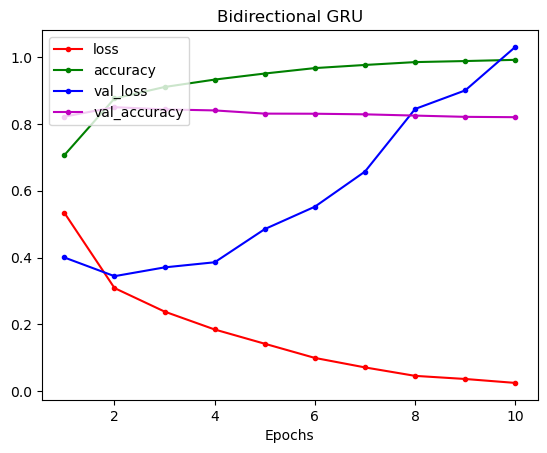

In [38]:
import matplotlib.pyplot as plt

plt.title('Bidirectional GRU')
plt.xlabel('Epochs')
plt.plot(range(1,11), history_gru.history['loss'], color = 'r', label = 'loss', marker = '.')
plt.plot(range(1,11), history_gru.history['accuracy'], color = 'g', label = 'accuracy', marker = '.')
plt.plot(range(1,11), history_gru.history['val_loss'], color = 'b', label = 'val_loss', marker = '.')
plt.plot(range(1,11), history_gru.history['val_accuracy'], color = 'm', label = 'val_accuracy', marker = '.')
plt.legend(loc = 'upper left')

# All Models Accuracies:

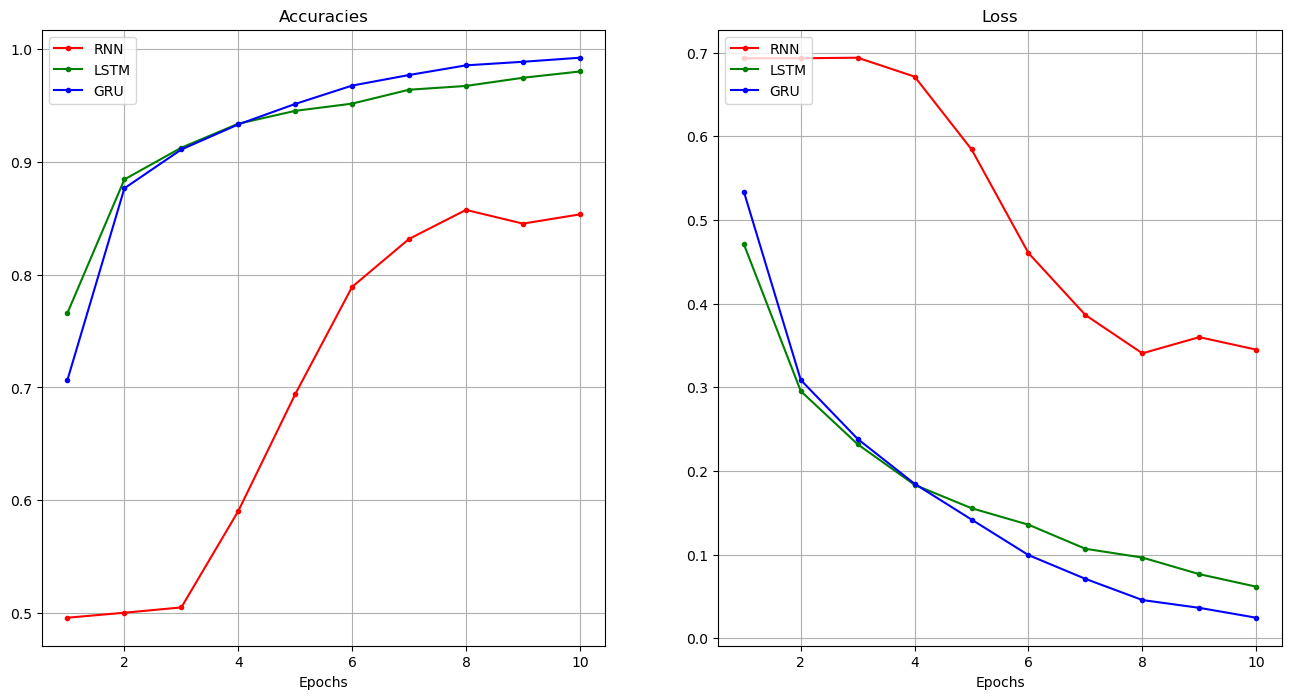

In [41]:
plt.figure(figsize = (16,8))

plt.subplot(1,2,1)
plt.title('Accuracies')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history.history['accuracy'], color = 'r', label = 'RNN', marker = '.')
plt.plot(range(1,11), history_lstm.history['accuracy'], color = 'g', label = 'LSTM', marker = '.')
plt.plot(range(1,11), history_gru.history['accuracy'], color = 'b', label = 'GRU', marker = '.')
plt.legend(loc = 'upper left')

plt.subplot(1,2,2)
plt.title('Loss')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history.history['loss'], color = 'r', label = 'RNN', marker = '.')
plt.plot(range(1,11), history_lstm.history['loss'], color = 'g', label = 'LSTM', marker = '.')
plt.plot(range(1,11), history_gru.history['loss'], color = 'b', label = 'GRU', marker = '.')

plt.legend(loc = 'upper left')

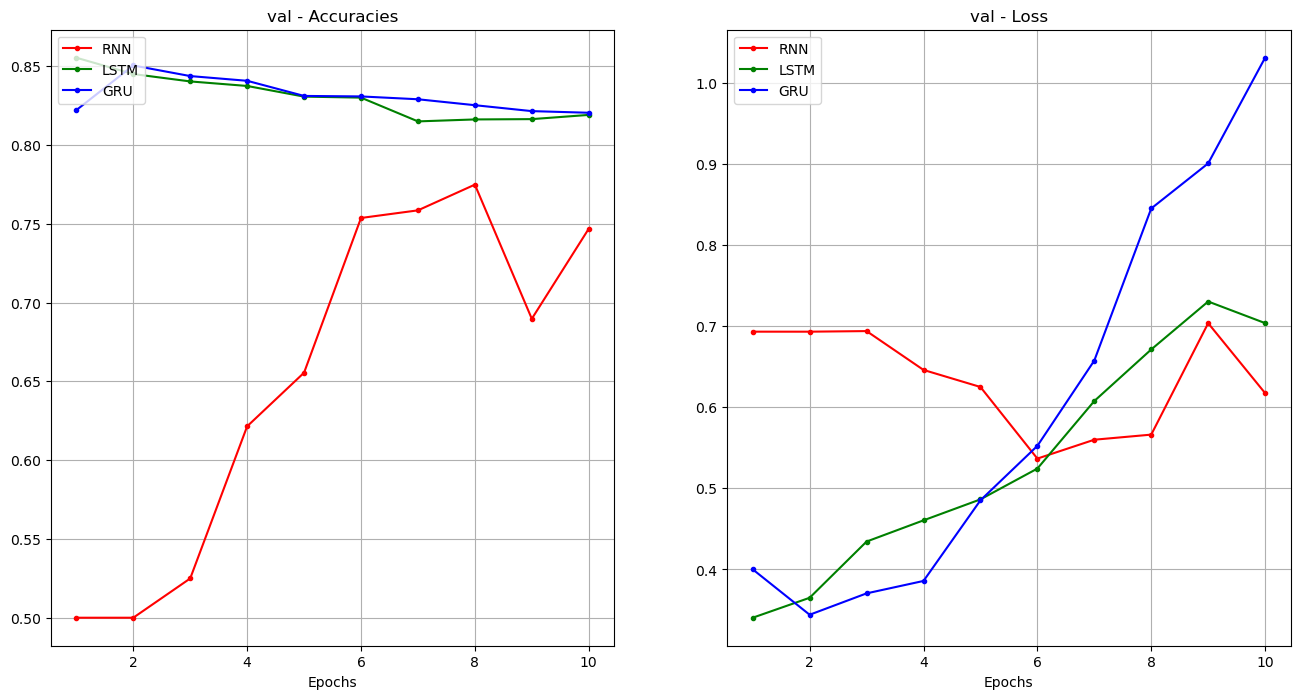

In [43]:
plt.figure(figsize = (16,8))

plt.subplot(1,2,1)
plt.title('val - Accuracies')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history.history['val_accuracy'], color = 'r', label = 'RNN', marker = '.')
plt.plot(range(1,11), history_lstm.history['val_accuracy'], color = 'g', label = 'LSTM', marker = '.')
plt.plot(range(1,11), history_gru.history['val_accuracy'], color = 'b', label = 'GRU', marker = '.')
plt.legend(loc = 'upper left')

plt.subplot(1,2,2)
plt.title('val - Loss')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history.history['val_loss'], color = 'r', label = 'RNN', marker = '.')
plt.plot(range(1,11), history_lstm.history['val_loss'], color = 'g', label = 'LSTM', marker = '.')
plt.plot(range(1,11), history_gru.history['val_loss'], color = 'b', label = 'GRU', marker = '.')

plt.legend(loc = 'upper left')

# Predict for the given reviews:

In [44]:
new1 = 'This was worst movie. Please do not watch it. Waste of money and time.'

new2 = 'A must watch movie. I loved to watch it. It was just amazing!'

In [61]:
# create one function to find the result and probability:

def predict(model, text):
    sequences = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequences, maxlen = max_length, truncating=trunc_type )
    
    res = model.predict(padded, verbose = False)
    perc_pos = res[0,0]

    if round(perc_pos)==0:
        return((1-perc_pos), 'negative')
    else:
        return((perc_pos), 'positive')
    

In [64]:
predict(model_gru, new1), predict(model_gru, new2)

((0.9999970928513449, 'negative'), (0.9999482, 'positive'))